In [1]:
from scipy.special import expit #to calculate logit 
import scipy.io as si
import numpy as np

#.mat file has two matrix X (5000*400) and y(5000*1)
File = si.loadmat('ex4data1.mat')

#sigmoid function implementation
def sigmoid_function(z):
          return expit(z)

#sigmoid gradient implementation
def sigmoid_gradient(Z):
    temp = sigmoid_function(Z)
    return (temp*(1 - temp))

#implement Forward Propagation
def compute_input_layer(theta1,input_layer):
    return (sigmoid_function(np.dot(input_layer,theta1.T)))

def compute_hidden_layer(theta2,A):
    return (sigmoid_function(np.dot(A,theta2.T)))

#return 5000*10 matrix
def compute_hypothesis(Theta1,Theta2,input_layer):
    
    #get 5000*25 matrix
    A1 = compute_input_layer(Theta1,input_layer)
    
    #change A dim to 5000*26
    A1 = np.insert(A1,0,1,axis = 1)

    #get 5000*10 matrix
    A2 = compute_hidden_layer(Theta2,A1)
    return A2 , A1

#implement Cost function for Neural Nertwork with no Regularization

#implement Cost function for Neural Nertwork with  Regularization
def Cost_function_reg(Theta_L,input_layer,actual_result,K,Lambda,m,shape1,shape2):
    
    #unroll t_theta1 and t_theta2
    t_theta1 = (Theta_L[0:shape1[0]*shape1[1]]).reshape(shape1[0],shape1[1])
    t_theta2 = (Theta_L[shape1[0]*shape1[1]:]).reshape(shape2[0],shape2[1])
    
    #create theta1 and theta2
    theta1 = t_theta1
    theta1 = np.delete(theta1,0,1)
    theta2 = t_theta2
    theta2 = np.delete(theta2,0,1)
    
    #calculate hypothesis
    hypothesis1 , hypothesis2 = compute_hypothesis(t_theta1,t_theta2,input_layer)
    
    #iterate it for each training data
    term1 =  - np.sum(np.multiply(actual_result,np.log(hypothesis1))) 
    term2 =  - np.sum(np.multiply((1 -actual_result),np.log(1 - hypothesis1))) 
    cost =  term1 + term2
            
    cost = (cost/m)
    
    #calculate Regularizarion Term
    
    #minimize each theta presents in all_theta dictionary
                      
    #regularize theta1
    t1 = np.sum(theta1*theta1) 
    
    #regularize theta2
    t2 = np.sum(theta2*theta2)
    
    Reg_term = (Lambda/(2*m)) * (t1 + t2)
   
    #update cost
    cost = cost + Reg_term
    return cost


In [2]:
#implement BackPropagation
def BackPropagation_Reg(Theta_L,input_layer,output_layer,K,Lambda,m,shape1,shape2):
    
    #unroll t_theta1 and t_theta2
    t_theta1 = (Theta_L[0:shape1[0]*shape1[1]]).reshape(shape1[0],shape1[1])
    t_theta2 = (Theta_L[shape1[0]*shape1[1]:]).reshape(shape2[0],shape2[1])
    
    t1 = t_theta1
    t2 = t_theta2

    #calculate forward propagation
    hypothesis1 , hypothesis2 = compute_hypothesis(t_theta1,t_theta2,input_layer)
    
    #computes small delta
    
    #compute delta_3
    delta_3 = hypothesis1 - output_layer
    
    #compute delta_2
    term1 = delta_3.dot(init_theta2)
    delta_2 = term1*(hypothesis2*(1 - hypothesis2))
    delta_2 = np.delete(delta_2,0,1)
    
    #compute gradient for layer 1 with regularization
    grad_1 = np.dot(input_layer.T,delta_2).T
    grad_1 = grad_1/m
    
    t1 = np.delete(t1,0,1)
    t1 = np.insert(t1,0,0,1)
    
    grad_1 = grad_1 + (Lambda/m)*t1
    
    #compute gradient for layer 2
    grad_2 = ((delta_3).transpose()).dot(hypothesis2)
    grad_2 = grad_2/m
    
    t2 = np.delete(t2,0,1)
    t2 = np.insert(t2,0,0,1)
    grad_2 = grad_2 + (Lambda/m)*t2
    
    #make a long gradient vector
    grad_L = np.concatenate((grad_1.flatten(),grad_2.flatten()))
    grad_L = np.ndarray.flatten(grad_L)
    return (grad_L)


In [3]:
#load input_layer
input_layer = np.array(File['X'])
input_layer = np.insert(input_layer,0,1,axis = 1)
m = len(File['X'])
print(m)
#create actual result of training set in form of {0,1}
def result_binary(actual_result,num_labels):
    y = np.zeros((len(actual_result),num_labels))
    for i in range(len(actual_result)):
        temp = actual_result[i]
        y[i][temp - 1] = 1
    return y

output_layer = result_binary(File['y'],10)

#randomly initializes theata1(25,401) and theta2(10,26) for a given epsilon
Lambda = 1
K = 10
input_layer_size = 400
hidden_layer_size = 25

shape1 = (25,401)
shape2 = (10,26)

def randInitializes(L_in,L_out):
    epsilon = 0.12
    rand_theta = np.random.rand(L_out,1 + L_in)*2*epsilon - epsilon
    return rand_theta

init_theta1 = randInitializes(input_layer_size,hidden_layer_size)
init_theta2 = randInitializes(hidden_layer_size,K)

#create a long theta
theta_L = np.concatenate((init_theta1.flatten(),init_theta2.flatten()))
theta_L = np.ndarray.flatten(theta_L)
print(theta_L.shape)

5000
(10285,)


In [4]:
gradient = BackPropagation_Reg(theta_L,input_layer,output_layer,K,Lambda,m,shape1,shape2)
print(gradient.shape)

(10285,)


In [6]:
#optimize theta_L with fmincg
import scipy.optimize
from scipy.optimize import minimize

#opt = minimize(Cost_function_reg,theta_L,args = (input_layer,output_layer,K,0,m,shape1,shape2),method = 'TNC' ,options = {'maxiter':20,'disp':True})
result = scipy.optimize.fmin_bfgs(Cost_function_reg, x0=theta_L ,fprime = BackPropagation_Reg,args=(input_layer,output_layer,K,Lambda,m,shape1,shape2),maxiter = 200,disp=True,full_output = True)


MemoryError: 

In [18]:
print(theta_L.shape,result[0].T.shape)
opt_theta1 = result[0][0:25*401].reshape(25,401)
opt_theta2 = result[0][25*401:].reshape(10,26)
print(opt_theta1[0].item(0),opt_theta2[1].item(0),init_theta1[0].item(0),init_theta2[0].item(0))

Theta_L = np.concatenate((opt_theta1.flatten(),opt_theta2.flatten()))
Theta_L = Theta_L.reshape(len(opt_theta1.flatten()) + len(opt_theta2.flatten()) ,1)

print(Cost_function_reg(Theta_L,input_layer,output_layer,K,Lambda,m,shape1,shape2))

(10285,) (10285,)
-0.11799590500508601 -2.48822679348802 -0.06574374029862518 -0.02143280553937993
0.671802351764


In [8]:
#prediction and accuracy
def predict_accuracy(theta1,theta2,input_layer,result):
    correct = 0
    wrong = 0
    hypothesis1 , hypothesis2 = compute_hypothesis(theta1,theta2,input_layer)

    for j in range(len(hypothesis1)):
        
        #find classifier which have highest probability for jth training set
        classifier = np.argmax(hypothesis1[j]) + 1
        #print("\nFor data ",j,"  classifier = ",classifier," Actual result is ",result[j])
        
        if (classifier == result[j]):
            correct += 1
        else:
            wrong += 1

    print("Accuracy of our model is ",(correct*100)/5000 , "correct = ",correct," wrong = ",wrong)

In [19]:
#all_theta =  si.loadmat('ex4weights.mat')

predict_accuracy(opt_theta1,opt_theta2,input_layer,File['y'])

Accuracy of our model is  92.98 correct =  4649  wrong =  351


[   0  200  400  600  800 1000 1200 1400 1600 1800 2000 2200 2400 2600 2800
 3000 3200 3400 3600 3800 4000 4200 4400 4600 4800]


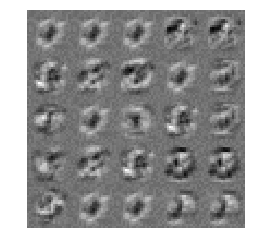

In [20]:
import matplotlib.pyplot as plt
#plot data
#create array to store 25 images with 20*20 pixels of each image
display = np.zeros((100,100))

#select randomly 25 numbers
selected = np.array(range(0,5000,200))
print(selected)

rows = 0
cols = 0

for data in selected:
    #create matrix of image from selected training data-sets
    
    #compute hidden layer for ith training set
    hidden_layer = compute_input_layer(opt_theta1,input_layer[data])
    activated_unit = np.argmax(hidden_layer)
    
    #get matrix of corresponding theta1 for which activated unit has highest probability
    act_matrix = opt_theta1[activated_unit].reshape(1,401)
    #remove bias unit
    act_matrix = np.delete(act_matrix,0,1)
    
    
    #Transpose the data to get a straight image
    temp = act_matrix.reshape(20,20).T
    
    #check if the first row of display array is filled or not
    if cols == 5:
        cols = 0
        rows += 1
    
    #copy data of temp into display array
    display[rows*20:rows*20+20,cols*20:cols*20+20] = temp
    cols += 1

#plot display as images
plt.axis('off')
plt.imshow(display,cmap='gray')